In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
%matplotlib notebook

In [3]:
dat = fits.getdata('faint_edr3_sources-result.fits.gz')

In [4]:
dat.columns

ColDefs(
    name = 'pm'; format = 'D'
    name = 'pm_unc'; format = 'D'
    name = 'parallax_over_error'; format = 'E'
    name = 'b'; format = 'D'; unit = 'deg'
    name = 'astrometric_params_solved'; format = 'I'
)

<IPython.core.display.Javascript object>


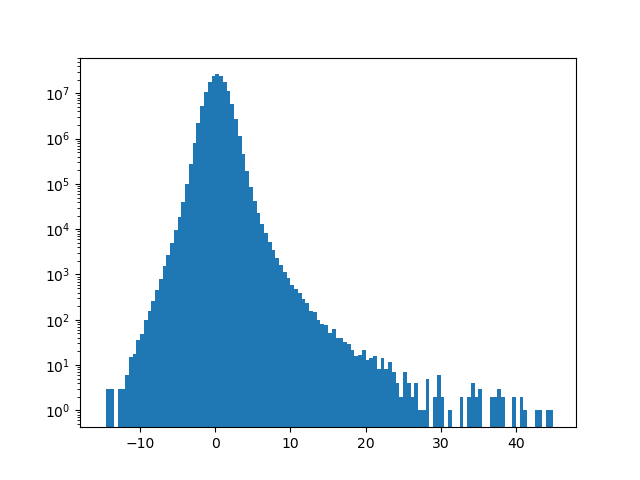

array([0.27757443, 2.21220303, 3.15436728, 4.6955572 , 7.2186996 ])

In [5]:
plt.figure()
_ = plt.hist(dat.parallax_over_error, range=(-15,45), bins=120)
plt.yscale('log')

np.percentile(dat.parallax_over_error, (50,95,99,99.9,99.99))

In [14]:
cut = 8
high_plx = len(np.where(dat.parallax_over_error >= cut)[0])
neg_plx = len(np.where(dat.parallax_over_error <= -cut)[0])

print("There are {} faint stars with pi > {}".format(high_plx, cut))
print("There are {} faint stars with pi < -{}".format(neg_plx, cut))
print("The number of potential non-stars in this selection is ~{:.3}".format(neg_plx/high_plx))

There are 8955 faint stars with pi > 8
There are 651 faint stars with pi < -8
The number of potential non-stars in this selection is ~0.0727


In [9]:
1906/17474

0.1090763419938194

<IPython.core.display.Javascript object>


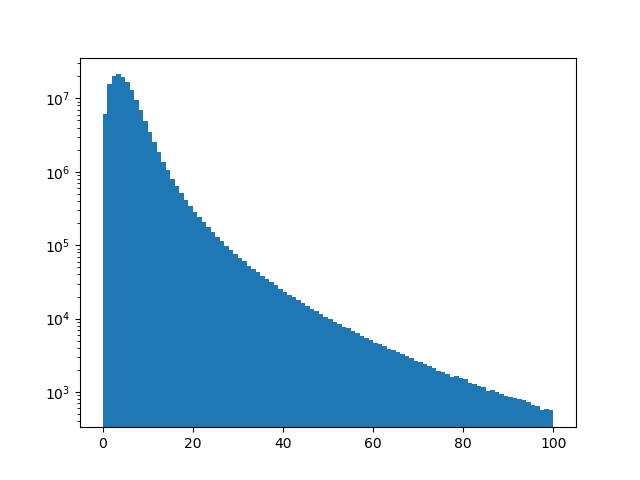

array([  4.56614716,  13.00338833,  23.52408749,  51.33706787,
       101.06213586])

In [16]:
plt.figure()
_ = plt.hist(dat.pm/dat.pm_unc, range=(0,100), bins=100)
plt.yscale('log')
np.percentile(dat.pm/dat.pm_unc, (50,95,99,99.9,99.99))